In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('D:/BRAC/Thesis/data/recent/heart_rajniKant_11days_1.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
f=df['ca']==0
df=df.drop(index=df[f].index)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0


In [ ]:
#ca and chol relationship

<AxesSubplot:xlabel='chol', ylabel='ca'>

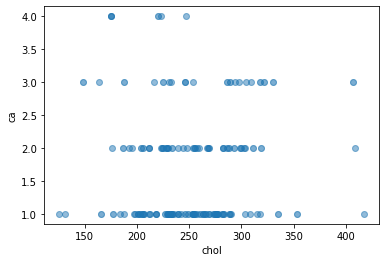

In [45]:
sns.regplot(x = "chol", y="ca", data=df, fit_reg = False, scatter_kws={"alpha": 0.2})

In [76]:
#sns.jointplot(x = "chol", y="ca", data=df, kind = 'kde')

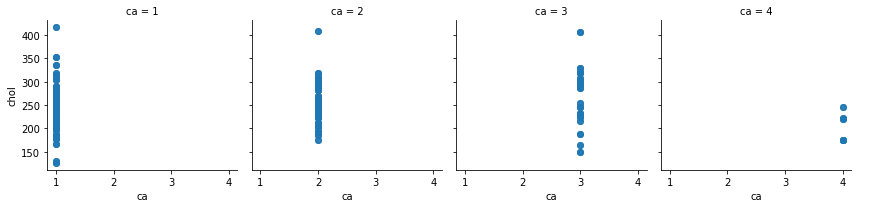

In [53]:
df["cax"] = df.ca.replace({1:1, 2:2, 3:3, 4:4}) 
sns.FacetGrid(df, col = "ca").map(plt.scatter, "ca", "chol", alpha =0.6).add_legend()

In [77]:
#plt.figure(figsize=(120, 40))
#a = sns.boxplot(df.chol, df.ca)

In [78]:
#plt.scatter(df['chol'], df['ca'])
#plt.show()

In [79]:
#d = df[['ca','chol']]

#sns.pairplot(d, kind="reg")
#plt.show()

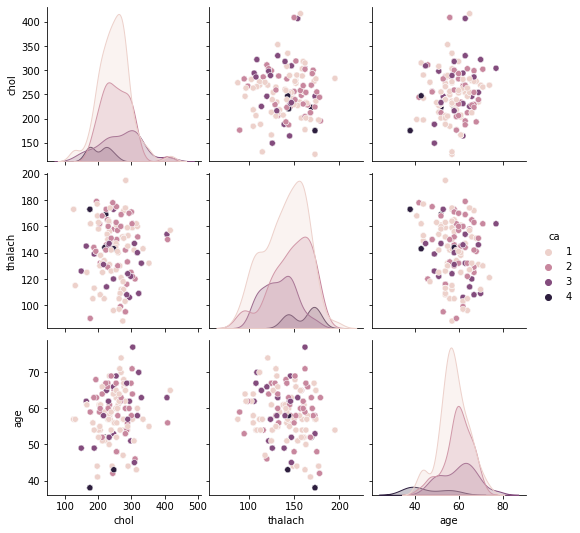

In [64]:
d = df[['ca', 'chol', 'thalach', 'age']]    #'thalach', 'age'
sns.pairplot(d, hue = 'ca')

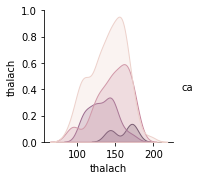

In [65]:
d = df[['ca',  'thalach']]    #'thalach', 'age'
sns.pairplot(d, hue = 'ca')

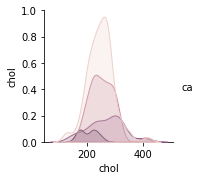

In [75]:
d = df[['chol',  'ca']]    #'thalach', 'age'
sns.pairplot(d, hue = 'ca')

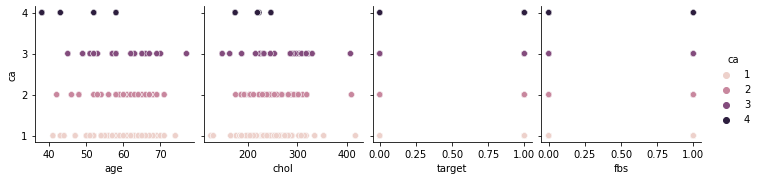

In [6]:
sns.pairplot(df, hue="ca", y_vars=['ca'], x_vars=['age', 'chol', 'target', 'fbs'])

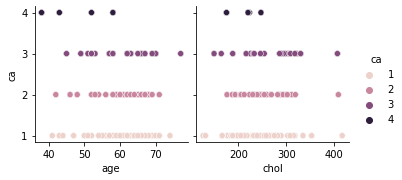

In [7]:
sns.pairplot(df, hue="ca", y_vars=['ca'], x_vars=['age', 'chol'])

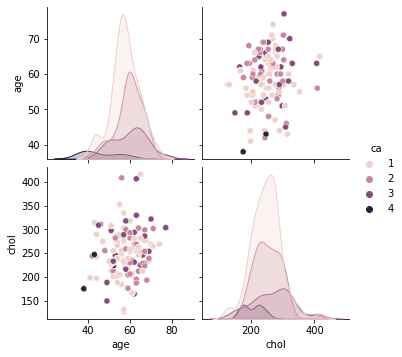

In [20]:
d = df[['ca', 'age' , 'chol']]    #'thalach', 'age'
sns.pairplot(d, hue = 'ca')

In [187]:
dp=pd.DataFrame(
{
    'Algorithms':  ['Catboost', 'LightGBM', 'XGBoost', 'GradientBoost', 'AdaBoost', 'Decison Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'Logistic Regression', 'Linear Regression'], 
    'Accuracy' : [99.12, 99.12, 99.12, 98.23, 91.15, 100, 100, 85.21, 100, 84.44, 87.16, 84.79],
    'Classification Error' : [0.88, 0.88, 0.88, 1.77, 8.85, 0, 0, 14.79, 0, 15.56, 12.84, 15.21],
    'Precision' : [99,99,99,98,91,100,100,86,100,85,88,85],
    'Recall' : [99,99,99,98,91,100,100,85,100,84,87,84],
    'F1_score' : [99,99,99,98,91,100,100,85,100,84,87,84]
}
)

In [188]:
dp.head()

,Algorithms,Accuracy,Classification Error,Precision,Recall,F1_score
0,Catboost,99.12,0.88,99,99,99
1,LightGBM,99.12,0.88,99,99,99
2,XGBoost,99.12,0.88,99,99,99
3,GradientBoost,98.23,1.77,98,98,98
4,AdaBoost,91.15,8.85,91,91,91


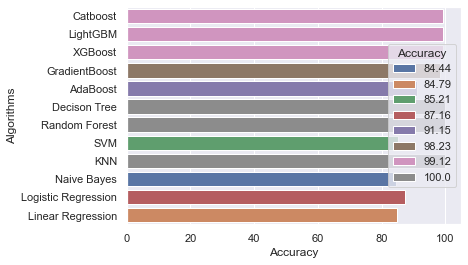

In [189]:
a=sns.barplot(y='Algorithms', x='Accuracy', data=dp, ci=None, hue='Accuracy', orient='h', dodge=False ) #dodge=False

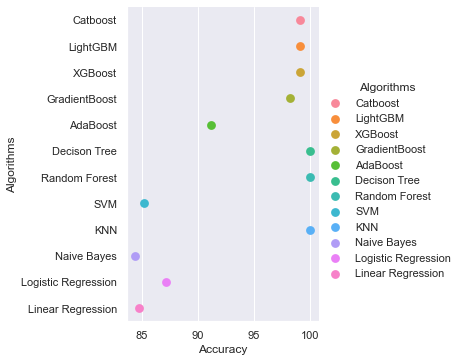

In [194]:
#plt.plot("Algorithms", "Accuracy ")
sns.catplot(y="Algorithms", x="Accuracy", hue="Algorithms", kind="point", data=dp)

Text(0.5, 0.98, 'Categorical Plotting')

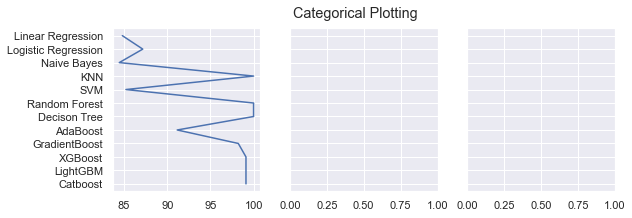

In [285]:
names=dp["Algorithms"]
values=dp["Accuracy"]

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
#axs[0].bar(names, values)
#axs[1].scatter(names, values)
axs[0].plot(values,names)
fig.suptitle('Categorical Plotting')

<AxesSubplot:xlabel='Accuracy', ylabel='Algorithms'>

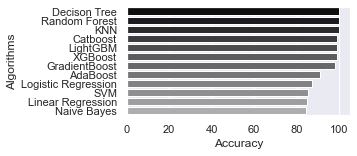

In [304]:
plt.figure(figsize=(4,2))
# make barplot and sort bars in descending order
sns.barplot(x=values, 
            y=names, 
            data=dp, 
            palette=sns.color_palette("Greys_r",20),
            order=dp.sort_values("Accuracy",ascending = False).Algorithms
            
           )

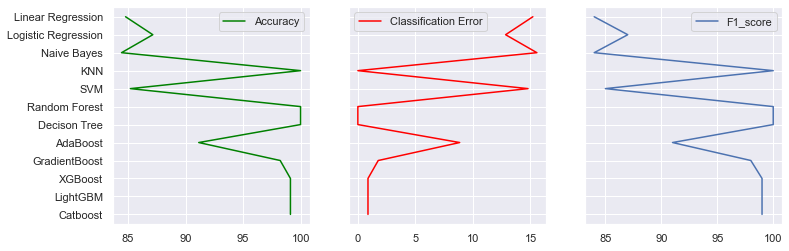

In [244]:
names=dp["Algorithms"]   
values1=dp["Accuracy"]     #Accuracy
values2=dp["Classification Error"] 
values3=dp["F1_score"] 
fig,axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
axs[0].plot(values1,names, color="green", label="Accuracy")
axs[0].legend()
axs[1].plot(values2,names, color="red", label="Classification Error")
axs[1].legend()
axs[2].plot(values3,names , label="F1_score")
axs[2].legend()
#axs[0].set_size_inches(15,3)
#fig.suptitle('Accuracy')

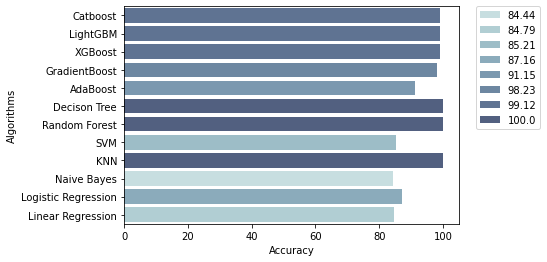

In [93]:
#q=sns.dark_palette("#69d", reverse=True, as_cmap=True)
a=sns.barplot(y='Algorithms', x='Accuracy', hue='Accuracy', data=dp,ci=None, palette=sns.color_palette("ch:s=.1,rot=-.25",11), dodge=False ) #dark:salmon_r#Blues_d
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

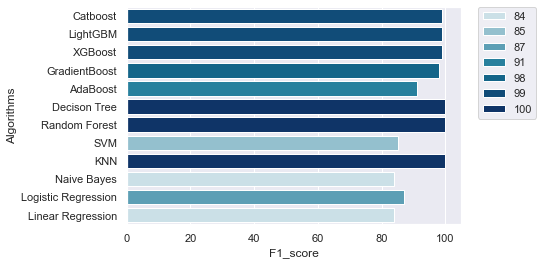

In [303]:
#q=sns.dark_palette("#69d", reverse=True, as_cmap=True)
a=sns.barplot(y='Algorithms', x='F1_score', hue='F1_score', data=dp, palette=sns.color_palette("ocean_r",12), dodge=False ) #dark:salmon_r#Blues_d
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

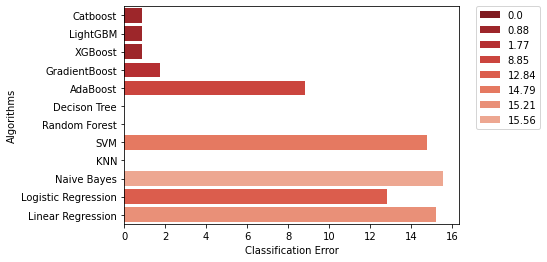

In [92]:
#q=sns.dark_palette("#69d", reverse=True, as_cmap=True)
a=sns.barplot(y='Algorithms', x='Classification Error', hue='Classification Error', data=dp, palette=sns.color_palette("Reds_r",11), dodge=False ) #dark:salmon_r#Blues_d
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [310]:
dq=pd.DataFrame(
{
    'Algorithms':  ['Catboost', 'LightGBM', 'XGBoost', 'GradientBoost', 'AdaBoost', 'Decison Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'Logistic Regression', 'Linear Regression'], 
    'Accuracy' : [96.17, 94.99, 94.10, 94.10, 60.47, 100, 98.44, 64.98, 98.44, 51.36, 60.31, 77.78],
    'Classification Error' : [3.83, 5.01, 5.90, 5.90, 39.53, 0, 1.56, 35.02, 1.56, 48.64, 39.69, 22.22],
    'Precision' : [99,98,96,96,32,100,99,66,99,59,51,68],
    'Recall' : [95,94,94,94,29,100,98,65,98,51,60,77],
    'F1_score' : [97,96,95,95,27,100,98,62,98,55,53,70]
}
)

In [311]:
dq.head()

,Algorithms,Accuracy,Classification Error,Precision,Recall,F1_score
0,Catboost,96.17,3.83,99,95,97
1,LightGBM,94.99,5.01,98,94,96
2,XGBoost,94.10,5.90,96,94,95
3,GradientBoost,94.10,5.90,96,94,95
4,AdaBoost,60.47,39.53,32,29,27


<AxesSubplot:xlabel='Accuracy', ylabel='Algorithms'>

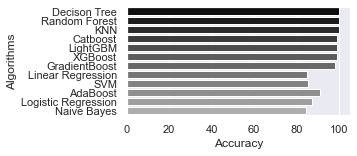

In [312]:
plt.figure(figsize=(4,2))
# make barplot and sort bars in descending order
sns.barplot(x=values, 
            y=names, 
            data=dq, 
            palette=sns.color_palette("Greys_r",20),
            order=dq.sort_values("Accuracy",ascending = False).Algorithms
            
           )

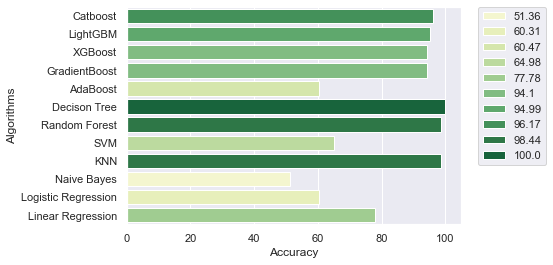

In [315]:
#q=sns.dark_palette("#69d", reverse=True, as_cmap=True)
a=sns.barplot(y='Algorithms', x='Accuracy', hue='Accuracy', data=dq,ci=None, palette=sns.color_palette("YlGn",11), dodge=False ) #dark:salmon_r#Blues_d
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

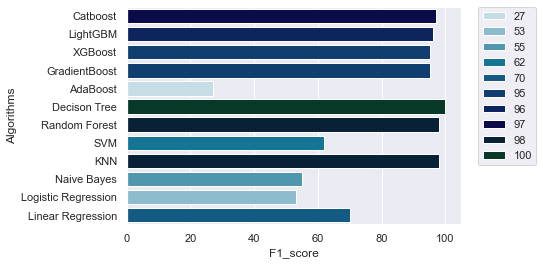

In [316]:
#q=sns.dark_palette("#69d", reverse=True, as_cmap=True)
a=sns.barplot(y='Algorithms', x='F1_score', hue='F1_score', data=dq, palette=sns.color_palette("ocean_r",11), dodge=False ) #dark:salmon_r#Blues_d
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

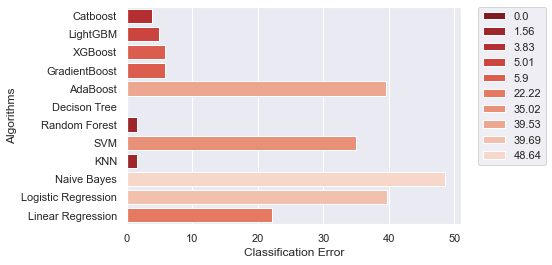

In [317]:
#q=sns.dark_palette("#69d", reverse=True, as_cmap=True)
a=sns.barplot(y='Algorithms', x='Classification Error', hue='Classification Error', data=dq, palette=sns.color_palette("Reds_r",11), dodge=False ) #dark:salmon_r#Blues_d
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [2]:
dd=pd.DataFrame(
{
    'Algorithms':  ['Catboost', 'LightGBM', 'XGBoost', 'GradientBoost', 'AdaBoost', 'Decison Tree', 'Random Forest', 'SVM', #'KNN',
                    'Naive Bayes', 'Logistic Regression', 'Linear Regression'], 
    'features' : ['age', 'chol','chol', 'age','chol', 'age', 'age', 'target', 'chol', 'target', 'fbs']
    
}
)
dd.head()

,Algorithms,features
0,Catboost,age
1,LightGBM,chol
2,XGBoost,chol
3,GradientBoost,age
4,AdaBoost,chol


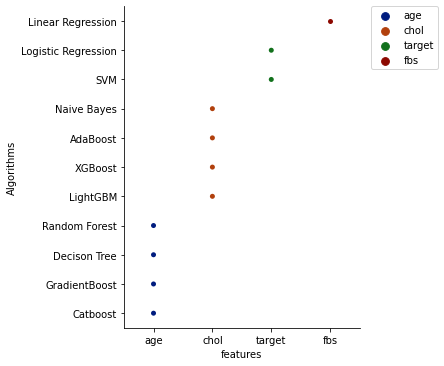

In [3]:
a=sns.catplot(y='Algorithms', x='features', hue='features', data=dd, jitter=False, palette="dark",  dodge=False ) #dark:salmon_r#Blues_d
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

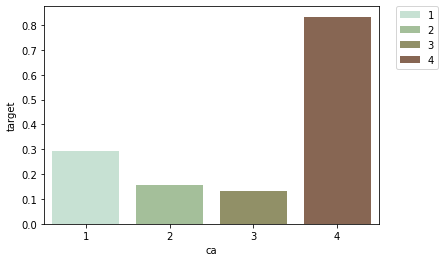

In [32]:
#q=sns.dark_palette("#69d", reverse=True, as_cmap=True)
a=sns.barplot(y='target', x='ca', hue='ca', data=df,ci=None, palette=sns.color_palette("ch:s=.100,rot=.80",), dodge=False ) #dark:salmon_r#Blues_d
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

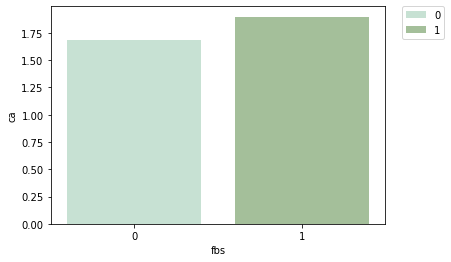

In [37]:
#q=sns.dark_palette("#69d", reverse=True, as_cmap=True)
a=sns.barplot(y='ca', x='fbs', hue='fbs', data=df,ci=None, palette=sns.color_palette("ch:s=.100,rot=.80",), dodge=False ) #dark:salmon_r#Blues_d
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [39]:
df['fbs'].value_counts()

0    359
1     88
Name: fbs, dtype: int64

In [62]:
idx_1 = np.where(df.target == 1)
idx_0 = np.where(df.target == 0)

idx_1

(array([  7,   9,  14,  15,  18,  20,  23,  30,  32,  33,  36,  40,  43,
         53,  55,  67,  78,  81,  82,  83,  85,  88,  95, 101, 102, 111,
        114, 116, 117, 118, 122, 125, 130, 131, 140, 141, 144, 152, 153,
        155, 158, 167, 172, 176, 177, 178, 181, 184, 188, 194, 196, 197,
        200, 209, 210, 213, 216, 221, 225, 226, 230, 234, 236, 237, 245,
        254, 260, 261, 264, 265, 277, 283, 284, 289, 292, 301, 303, 304,
        307, 310, 311, 312, 316, 322, 323, 325, 326, 333, 338, 352, 354,
        362, 363, 365, 388, 405, 406, 407, 409, 410, 413, 415, 416, 417,
        419, 423, 424, 425, 428, 437, 438], dtype=int64),)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

90.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

83.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

71.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



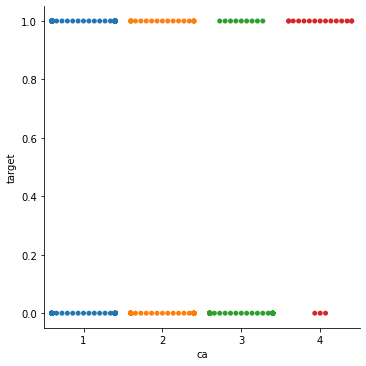

In [80]:
sns.catplot(x="ca", y="target", kind="swarm", data=df)

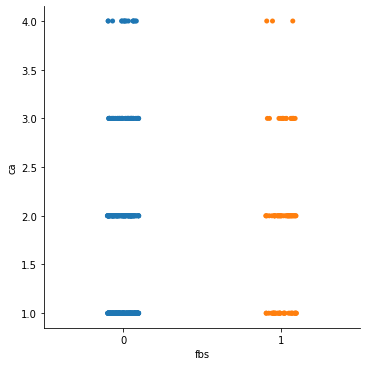

In [85]:
sns.catplot(x="fbs", y="ca", order=[0, 1], data=df)

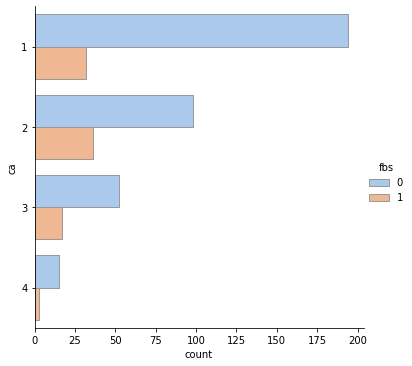

In [88]:
sns.catplot(y="ca", hue="fbs", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

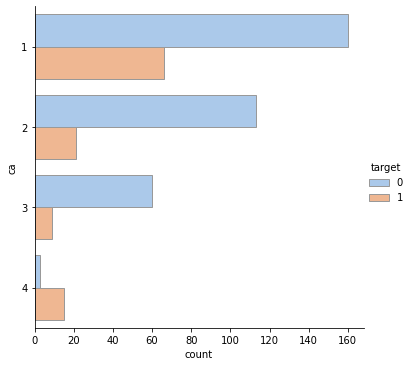

In [89]:
sns.catplot(y="ca", hue="target", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

In [133]:
dt=pd.DataFrame(
{
    'Algorithms':  [ 'GradientBoost', 'Decison Tree', 'Random Forest', 'SVM',  'Naive Bayes', 'Logistic Regression', 'Linear Regression'], 
    'Accuracy1' : [ 98.23,  100, 100, 85.21,  84.44, 87.16, 84.79],
    'ClassificationError1' : [ 1.77,  0, 0, 14.79,  15.56, 12.84, 15.21],
    'Accuracy2' : [78.3,85,86.1,86.1,75.8,82.9,85.1],
    'ClassificationError2' : [ 5.90,  15, 13.9, 13.9, 24.2, 17.1, 14.9]
}
)

dt

,Algorithms,Accuracy1,ClassificationError1,Accuracy2,ClassificationError2
0,GradientBoost,98.23,1.77,78.3,5.9
1,Decison Tree,100.00,0.00,85.0,15.0
2,Random Forest,100.00,0.00,86.1,13.9
3,SVM,85.21,14.79,86.1,13.9
4,Naive Bayes,84.44,15.56,75.8,24.2
5,Logistic Regression,87.16,12.84,82.9,17.1
6,Linear Regression,84.79,15.21,85.1,14.9


In [134]:
#sns.catplot(y="A1", hue="Al", kind="count", palette="pastel", edgecolor=".6", data=dt, dodge=False )

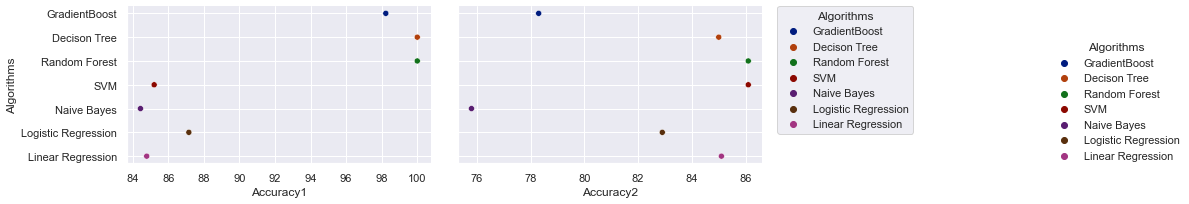

In [175]:
h=sns.pairplot(dt, hue='Algorithms', y_vars=['Algorithms'], x_vars=[ 'Accuracy1', 'Accuracy2'], palette=sns.color_palette("dark",7))
h.fig.set_size_inches(20,3)
plt.legend(bbox_to_anchor=(1.05, 1), title="Algorithms",loc=2, borderaxespad=0.)

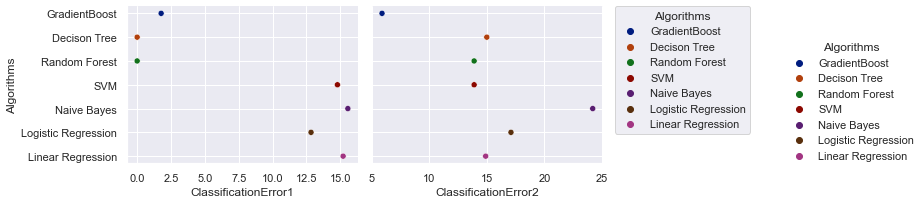

In [186]:
h=sns.pairplot(dt, hue='Algorithms', y_vars=['Algorithms'], x_vars=[ 'ClassificationError1', 'ClassificationError2'], palette="dark")
h.fig.set_size_inches(15,3)
plt.legend(bbox_to_anchor=(1.05, 1), title="Algorithms",loc=2, borderaxespad=0.)

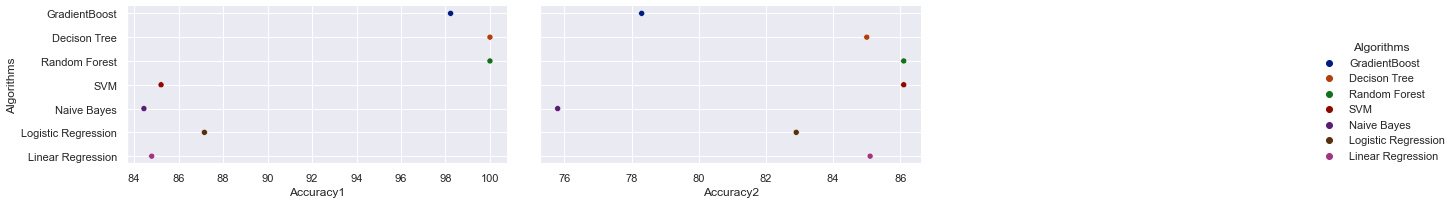

In [167]:
h=sns.pairplot(dt, hue='Algorithms', y_vars=['Algorithms'], x_vars=[ 'Accuracy1', 'Accuracy2'], palette=sns.color_palette("dark",7))
#h.set(xlim=(75,100))
h.fig.set_size_inches(25,3)

<AxesSubplot:ylabel='Frequency'>

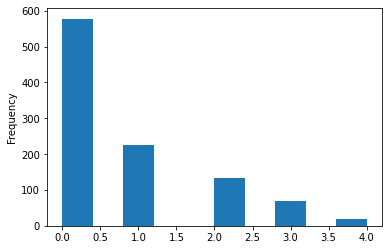

In [6]:
median_column = df["ca"]
type(median_column)
median_column.plot(kind="hist")

<Figure size 72x144 with 0 Axes>

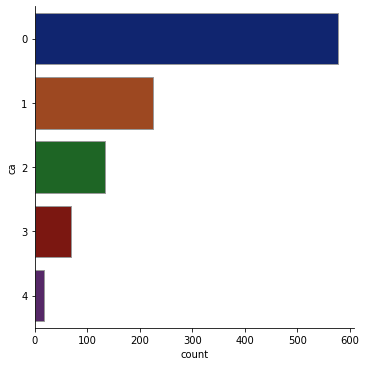

In [21]:
plt.figure(figsize=(1,2))
sns.catplot(y="ca",  kind="count",
            palette="dark", edgecolor=".6", dodge=False,
            data=df)

<Figure size 72x144 with 0 Axes>

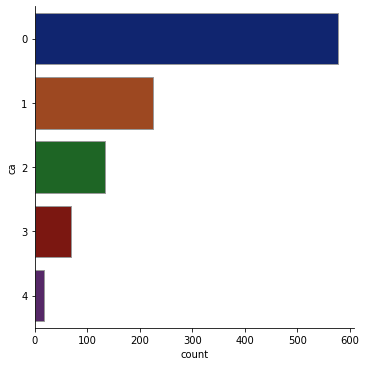

In [22]:
plt.figure(figsize=(1,2))
sns.catplot(y="ca",  kind="count",
            palette="dark", edgecolor=".6", dodge=False,
            data=df)

Text(0.5, 1.0, 'age')

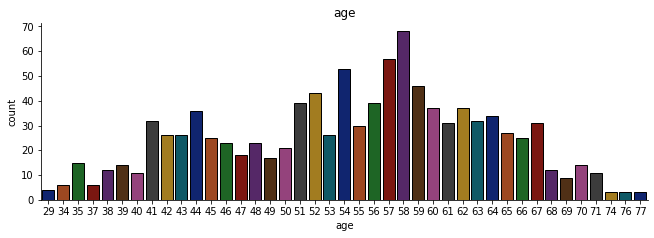

In [57]:
sns.catplot(x="age",  kind="count",
            palette="dark", edgecolor="0", dodge=False, 
            height=3, aspect=3,
            data=df)
plt.title('age')


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'sex')

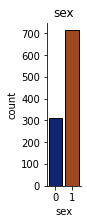

In [61]:
sns.catplot(x="sex",  kind="count",
            palette="dark", edgecolor="0", dodge=False, 
            height=3, aspect=0.2,
            data=df)
plt.title('sex')


Text(0.5, 1.0, 'cp')

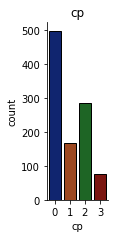

In [64]:
sns.catplot(x="cp",  kind="count",
            palette="dark", edgecolor="0", dodge=False, 
            height=3, aspect=0.5,
            data=df)
plt.title('cp')


Text(0.5, 1.0, 'trestbps')

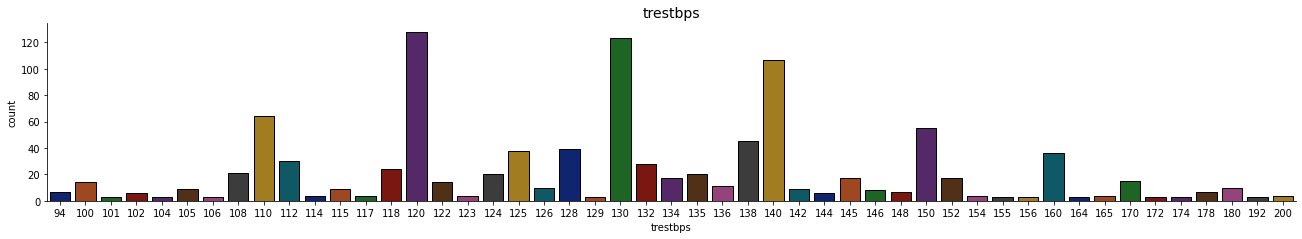

In [143]:
sns.catplot(x="trestbps",  kind="count",
            palette="dark", edgecolor="0", dodge=False, 
            height=3, aspect=6,
            data=df)
plt.title('trestbps', fontsize=14)


Text(0.5, 1.0, 'chol')

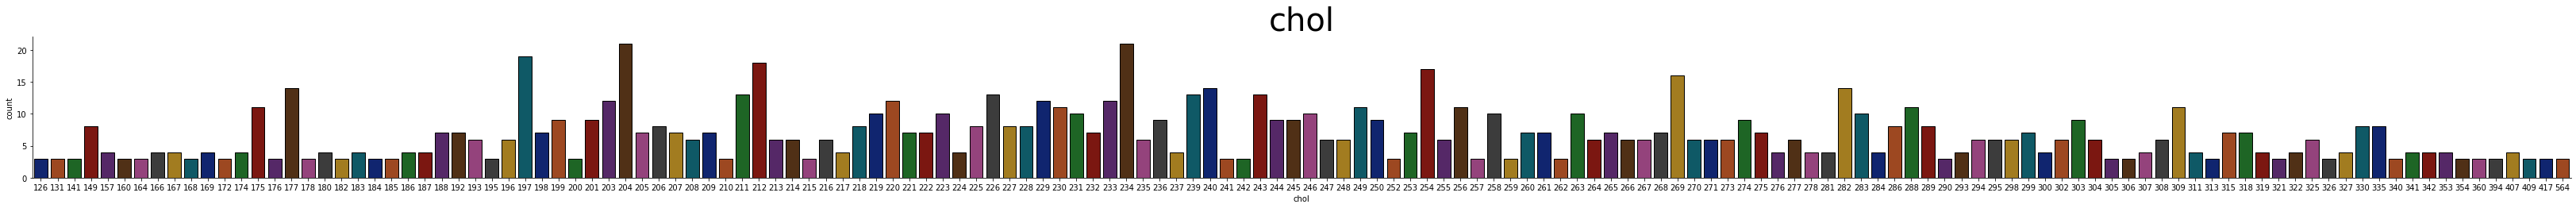

In [120]:
sns.catplot(x="chol",  kind="count", 
            palette="dark", edgecolor="0", dodge=False, 
            height=3, aspect=15,
            data=df)
plt.title('chol', fontsize=40)


<AxesSubplot:>

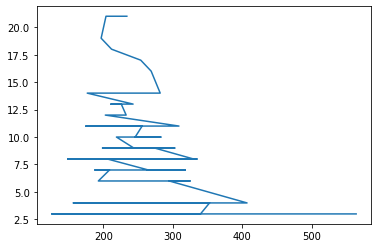

In [134]:
#df['chol'].value_counts().plot(kind='bar')
df['chol'].value_counts().plot()

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'fbs')

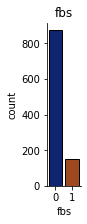

In [82]:
sns.catplot(x="fbs",  kind="count",
            palette="dark", edgecolor="0", dodge=False, 
            height=3, aspect=0.2,
            data=df)
plt.title('fbs')


Text(0.5, 1.0, 'restecg')

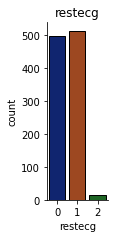

In [88]:
sns.catplot(x="restecg",  kind="count",
            palette="dark", edgecolor="0", dodge=False, 
            height=3, aspect=0.5,
            data=df)
plt.title('restecg')


Text(0.5, 1.0, 'thalach')

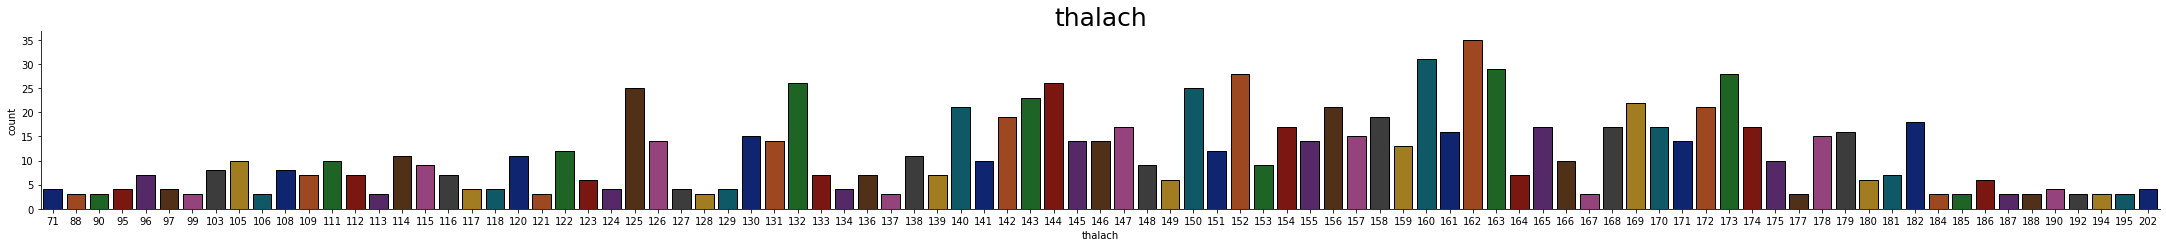

In [138]:
sns.catplot(x="thalach",  kind="count",
            palette="dark", edgecolor="0", dodge=False, 
            height=3, aspect=10,
            data=df)
plt.title('thalach', fontsize=25)


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'exang')

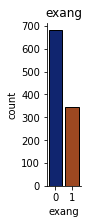

In [92]:
sns.catplot(x="exang",  kind="count",
            palette="dark", edgecolor="0", dodge=False, 
            height=3, aspect=0.2,
            data=df)
plt.title('exang')


Text(0.5, 1.0, 'oldpeak')

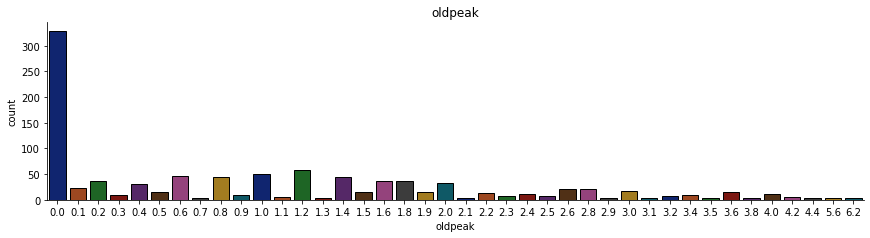

In [104]:
sns.catplot(x="oldpeak",  kind="count",
            palette="dark", edgecolor="0", dodge=False, 
            height=3, aspect=4,
            data=df)
plt.title('oldpeak')


Text(0.5, 1.0, 'slope')

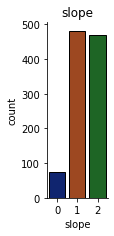

In [95]:
sns.catplot(x="slope",  kind="count",
            palette="dark", edgecolor="0", dodge=False, 
            height=3, aspect=0.5,
            data=df)
plt.title('slope')


Text(0.5, 1.0, 'ca')

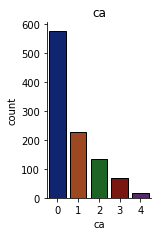

In [99]:
sns.catplot(x="ca",  kind="count",
            palette="dark", edgecolor="0", dodge=False, 
            height=3, aspect=0.7,
            data=df)
plt.title('ca')


Text(0.5, 1.0, 'thal')

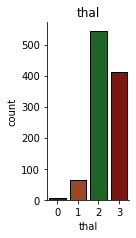

In [101]:
sns.catplot(x="thal",  kind="count",
            palette="dark", edgecolor="0", dodge=False, 
            height=3, aspect=0.6,
            data=df)
plt.title('thal')


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'target')

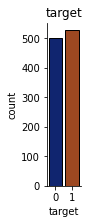

In [102]:
sns.catplot(x="target",  kind="count",
            palette="dark", edgecolor="0", dodge=False, 
            height=3, aspect=0.2,
            data=df)
plt.title('target')


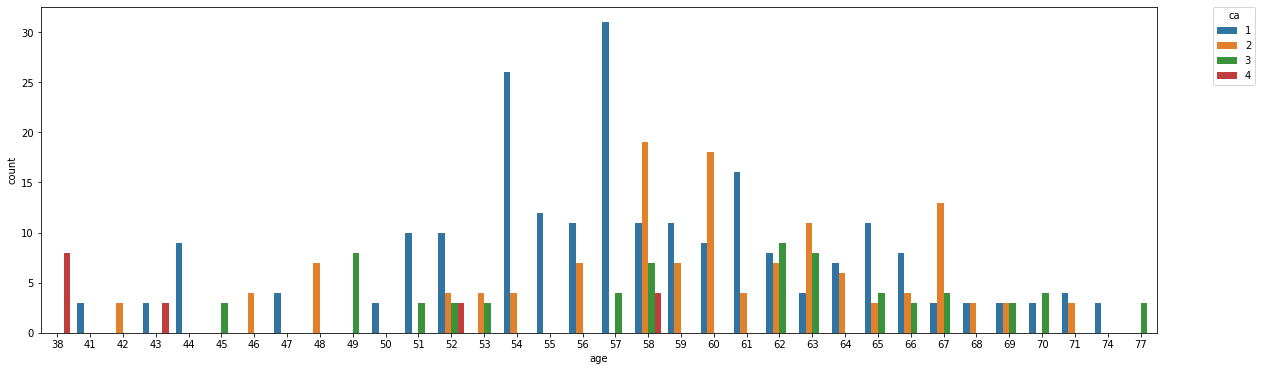

In [20]:
plt.figure(figsize=(20,6))
ax = sns.countplot(x="age", hue="ca", data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="ca")

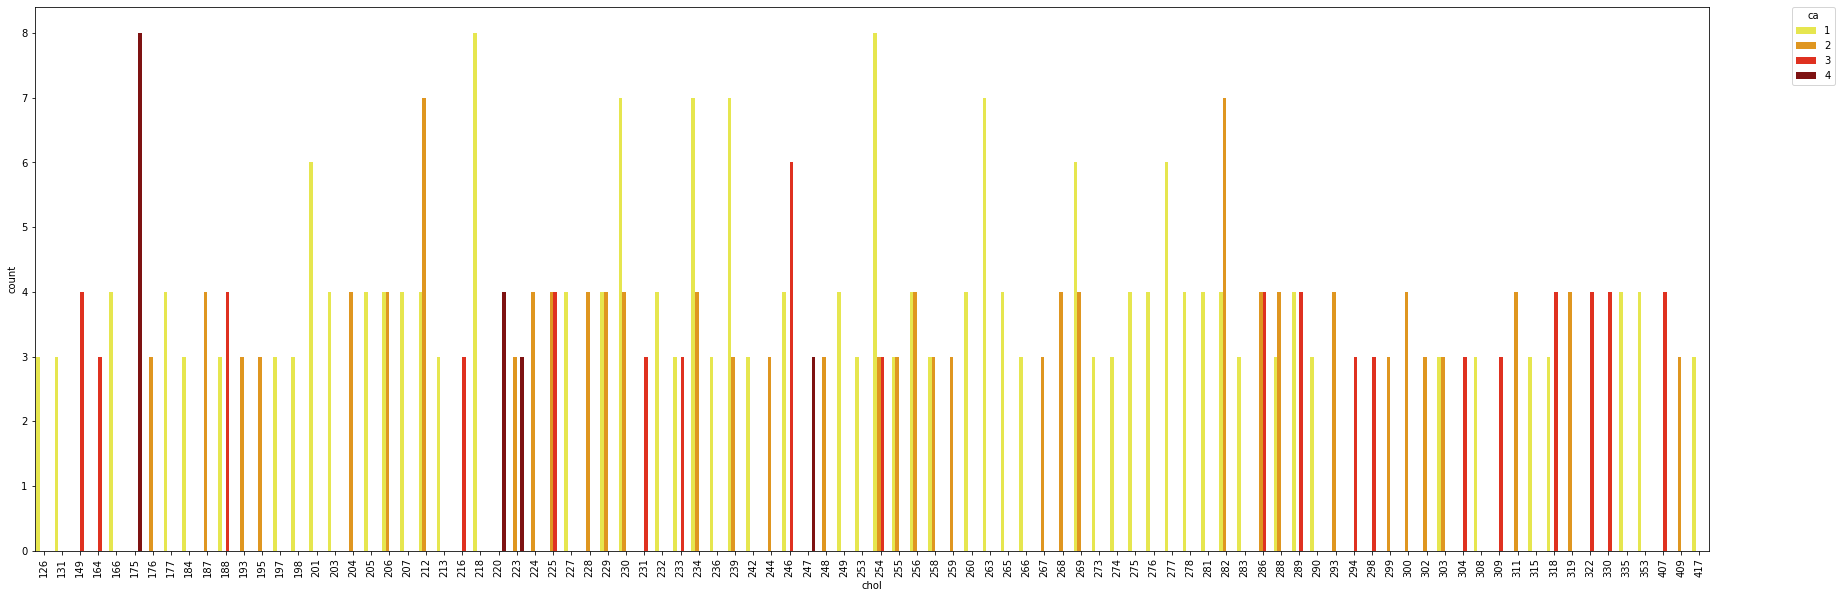

In [40]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x="chol", hue="ca", data=df, palette="hot_r")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="ca")  #210---260 and 280---410

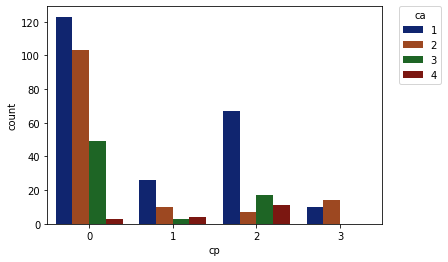

In [45]:
#plt.figure(figsize=(30,10))
ax = sns.countplot(x="cp", hue="ca", data=df, palette="dark")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="ca")  #210---260 and 280---410

In [ ]:
- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic

In [38]:
df['cp'] = df['cp'].replace(["No chest pain"],'no chest pain')
df['cp'] = df['cp'].replace([1],'typical angina')
df['cp'] = df['cp'].replace([2],'atypical angina')
df['cp'] = df['cp'].replace([3],'non-anginal pain')
df['cp'] = df['cp'].replace([4],'asymptomatic')

drop

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp1
0,52,1,no chest pain,125,212,0,1,168,0,1.0,2,2,3,0,0
3,61,1,no chest pain,148,203,0,1,161,0,0.0,2,1,3,0,0
4,62,0,no chest pain,138,294,1,1,106,0,1.9,1,3,2,0,0
6,58,1,no chest pain,114,318,0,2,140,0,4.4,0,3,1,0,0
7,55,1,no chest pain,160,289,0,0,145,1,0.8,1,1,3,0,0


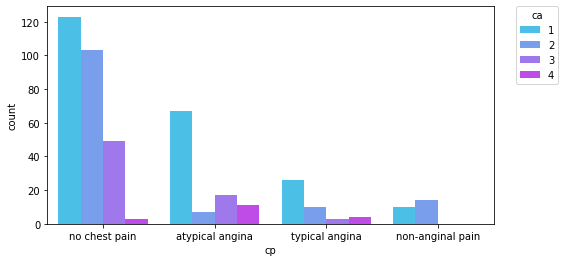

In [39]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x="cp", hue="ca", data=df, palette="cool")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="ca")  #210---260 and 280---410

<AxesSubplot:xlabel='cp', ylabel='age'>

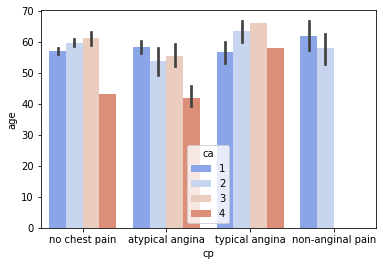

In [46]:
sns.barplot(x="cp",y="age",hue="ca",data=df, palette="coolwarm")

In [4]:
f=df['cp']==0
df=df.drop(index=df[f].index)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
27,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0
28,56,1,2,130,256,1,0,142,1,0.6,1,1,1,0
33,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
36,51,1,3,125,213,0,0,125,1,1.4,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1
987,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
989,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
1004,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1


<AxesSubplot:xlabel='cp', ylabel='age'>

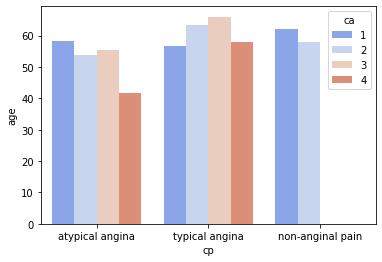

In [58]:
sns.barplot(x="cp",y="age",hue="ca",data=df, ci=None,palette="coolwarm")

<AxesSubplot:xlabel='cp', ylabel='chol'>

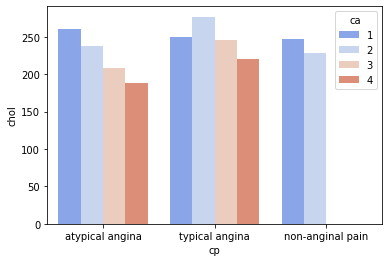

In [57]:
sns.barplot(x="cp",y="chol",hue="ca",data=df, ci=None, palette="coolwarm")

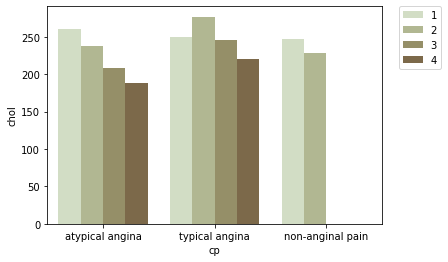

In [68]:
#q=sns.dark_palette("#69d", reverse=True, as_cmap=True)
a=sns.barplot(y='chol', x='cp', hue='ca', data=df,ci=None, palette=sns.color_palette("ch:s=.900,rot=.300",) ) #dark:salmon_r#Blues_d
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [5]:
dq=pd.DataFrame(
{
    'Algorithms':  ['Catboost', 'LightGBM', 'XGBoost', 'GradientBoost', 'AdaBoost', 'Decison Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'Logistic Regression', 'Linear Regression'], 
    'Accuracy' : [96.17, 94.99, 94.10, 94.10, 60.47, 100, 98.44, 64.98, 98.44, 51.36, 60.31, 77.78],
    'Classification Error' : [3.83, 5.01, 5.90, 5.90, 39.53, 0, 1.56, 35.02, 1.56, 48.64, 39.69, 22.22],
    'Precision' : [99,98,96,96,32,100,99,66,99,59,51,68],
    'Recall' : [95,94,94,94,29,100,98,65,98,51,60,77],
    'F1_score' : [97,96,95,95,27,100,98,62,98,55,53,70]
}
)
dq.head()

,Algorithms,Accuracy,Classification Error,Precision,Recall,F1_score
0,Catboost,96.17,3.83,99,95,97
1,LightGBM,94.99,5.01,98,94,96
2,XGBoost,94.10,5.90,96,94,95
3,GradientBoost,94.10,5.90,96,94,95
4,AdaBoost,60.47,39.53,32,29,27


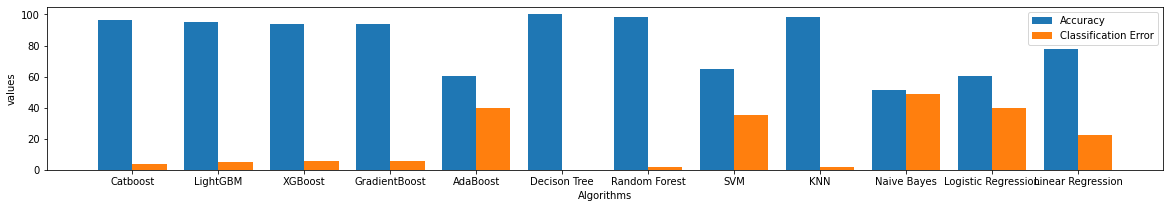

In [15]:
w=0.4
x= ['Catboost', 'LightGBM', 'XGBoost', 'GradientBoost', 'AdaBoost', 'Decison Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'Logistic Regression', 'Linear Regression']
b=[96.17, 94.99, 94.10, 94.10, 60.47, 100, 98.44, 64.98, 98.44, 51.36, 60.31, 77.78]
g=[3.83, 5.01, 5.90, 5.90, 39.53, 0, 1.56, 35.02, 1.56, 48.64, 39.69, 22.22]

bar1=np.arange(len(x))
bar2=[i+w for i in bar1]

plt.figure(figsize=(20,3))
plt.bar(bar1,b,w, label="Accuracy")
plt.bar(bar2,g,w, label="Classification Error")

plt.xlabel("Algorithms")
plt.ylabel("values") 
plt.xticks(bar1+w/2,x)
plt.legend()
plt.show()

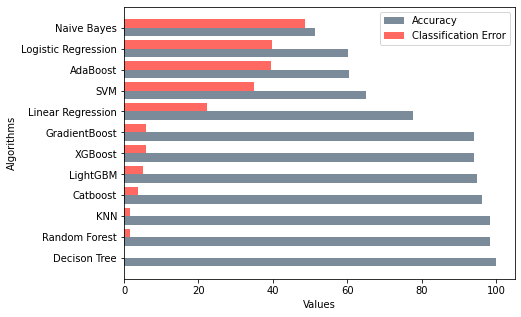

In [36]:
w=0.4
#x= ['Cat', 'Li', 'XGB', 'Gra', 'Ada', 'De', 'Rant', 'SVM', 'KNN', 'Nais', 'LogR', 'LinR']
#b=[96.17, 94.99, 94.10, 94.10, 60.47, 100,  98.44,  64.98,  98.44, 51.36,  60.31,  77.78]
#g=[3.83,  5.01,  5.90,  5.90,  39.53,   0,   1.56,  35.02,   1.56, 48.64,  39.69, 22.22]


x=['Decison Tree', 'Random Forest', 'KNN','Catboost', 'LightGBM', 'XGBoost', 'GradientBoost','Linear Regression','SVM',  'AdaBoost','Logistic Regression', 'Naive Bayes']
b=[100,  98.44, 98.44, 96.17, 94.99, 94.10, 94.10,  77.78, 64.98,60.47, 60.31, 51.36 ]
g=[0, 1.56, 1.56, 3.83,  5.01,  5.90,  5.90, 22.22,  35.02,39.53, 39.69, 48.64]

bar1=np.arange(len(x))
bar2=[i+w for i in bar1]

plt.figure(figsize=(7,5))
plt.barh(bar1,b,w, color="#7B8B9A", label="Accuracy")
plt.barh(bar2,g,w, color="#FF6961", label="Classification Error")


plt.ylabel("Algorithms")
plt.xlabel("Values") 
plt.yticks(bar1+w/2,x)
plt.legend()
plt.show()

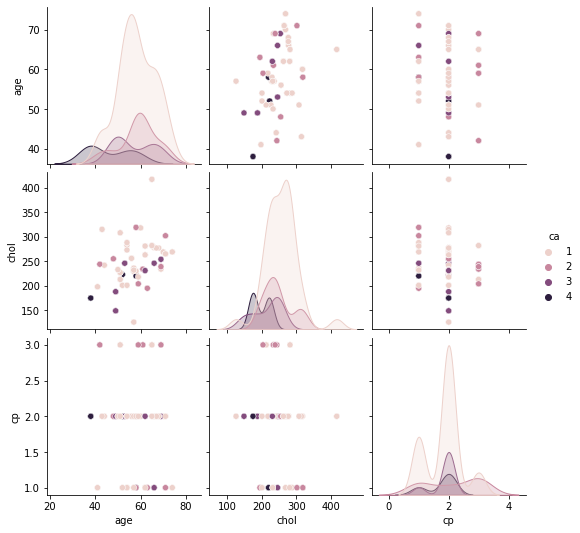

In [6]:
d = df[['ca', 'age' , 'chol', 'cp']]    #'thalach', 'age'
sns.pairplot(d, hue = 'ca')

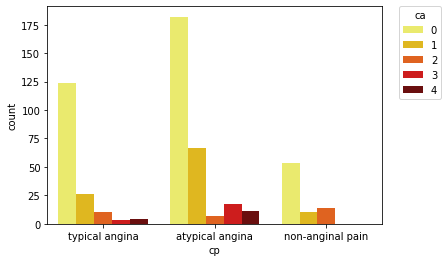

In [7]:
df['cp'] = df['cp'].replace(["No chest pain"],'no chest pain')
df['cp'] = df['cp'].replace([1],'typical angina')
df['cp'] = df['cp'].replace([2],'atypical angina')
df['cp'] = df['cp'].replace([3],'non-anginal pain')
df['cp'] = df['cp'].replace([4],'asymptomatic')


f=df['cp']==0
df=df.drop(index=df[f].index)

#plt.figure(figsize=(30,10))
ax = sns.countplot(x="cp", hue="ca", data=df, palette="hot_r")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="ca")  #210---260 and 280---410